In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import datetime as dt
from datetime import timedelta

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
covid=pd.read_csv("novel-corona-virus-2019-dataset/covid_19_data.csv")

In [6]:
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [7]:
covid.drop(["SNo"],1,inplace=True)

In [8]:
covid[covid['Province/State']=='Anhui']

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
38,01/23/2020,Anhui,Mainland China,1/23/20 17:00,9.0,0.0,0.0
95,01/24/2020,Anhui,Mainland China,1/24/20 17:00,15.0,0.0,0.0
131,01/25/2020,Anhui,Mainland China,1/25/20 17:00,39.0,0.0,0.0
176,01/26/2020,Anhui,Mainland China,1/26/20 16:00,60.0,0.0,0.0
...,...,...,...,...,...,...,...
22376,05/07/2020,Anhui,Mainland China,2020-05-08 02:32:32,991.0,6.0,985.0
22699,05/08/2020,Anhui,Mainland China,2020-05-09 02:32:35,991.0,6.0,985.0
23022,05/09/2020,Anhui,Mainland China,2020-05-10 02:32:30,991.0,6.0,985.0
23345,05/10/2020,Anhui,Mainland China,2020-05-11 02:32:30,991.0,6.0,985.0


In [9]:
print("Checking Data-type of each column:\n",covid.dtypes)

Checking Data-type of each column:
 ObservationDate     object
Province/State      object
Country/Region      object
Last Update         object
Confirmed          float64
Deaths             float64
Recovered          float64
dtype: object


In [10]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23804 entries, 0 to 23803
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  23804 non-null  object 
 1   Province/State   11426 non-null  object 
 2   Country/Region   23804 non-null  object 
 3   Last Update      23804 non-null  object 
 4   Confirmed        23804 non-null  float64
 5   Deaths           23804 non-null  float64
 6   Recovered        23804 non-null  float64
dtypes: float64(3), object(4)
memory usage: 1.3+ MB


In [11]:
#Converting "Observation Date" into Datetime format
covid["ObservationDate"]=pd.to_datetime(covid["ObservationDate"])

In [12]:
#Grouping different types of cases as per the date
datewise=covid.groupby(["ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
datewise["Days Since"]=datewise.index-datewise.index.min()

In [13]:
print("Totol number of countries with Disease Spread: ",len(covid["Country/Region"].unique()))

Totol number of countries with Disease Spread:  222


In [14]:
datewise.iloc[-1]

Confirmed            4.1775e+06
Recovered           1.45621e+06
Deaths                   286330
Days Since    110 days 00:00:00
Name: 2020-05-11 00:00:00, dtype: object

In [15]:
print("Total number of Confirmed Cases around the World: ",datewise["Confirmed"].iloc[-1])

Total number of Confirmed Cases around the World:  4177504.0


In [16]:
datewise.shape

(111, 4)

In [17]:
np.round(datewise["Confirmed"].iloc[-1]/datewise.shape[0])

37635.0

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110]),
 <a list of 111 Text major ticklabel objects>)

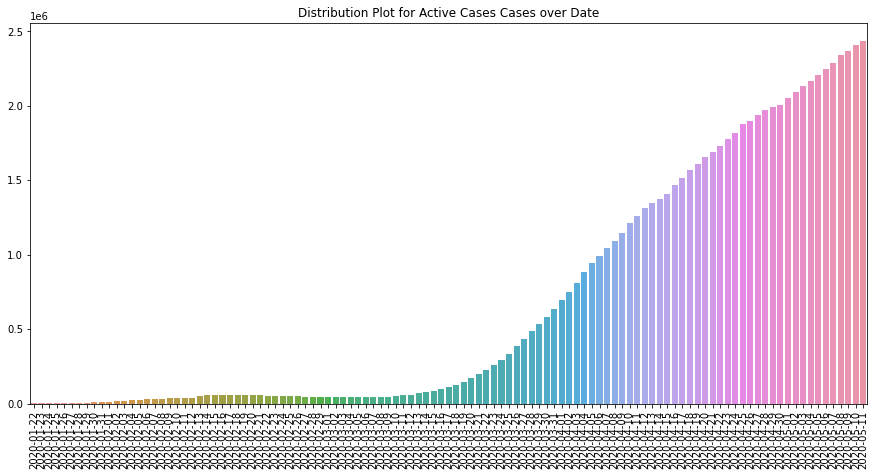

In [18]:
plt.figure(figsize=(15,7))
sns.barplot(x=datewise.index.date, y=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"])
plt.title("Distribution Plot for Active Cases Cases over Date")
plt.xticks(rotation=90)

In [19]:
datewise["WeekOfYear"]=datewise.index.weekofyear

In [20]:
datewise.head()

,Confirmed,Recovered,Deaths,Days Since,WeekOfYear
ObservationDate,,,,,
2020-01-22,555.0,28.0,17.0,0 days,4
2020-01-23,653.0,30.0,18.0,1 days,4
2020-01-24,941.0,36.0,26.0,2 days,4
2020-01-25,1438.0,39.0,42.0,3 days,4
2020-01-26,2118.0,52.0,56.0,4 days,4


In [21]:
week_num=[]
weekwise_confirmed=[]
weekwise_recovered=[]
weekwise_deaths=[]
for i in list(datewise["WeekOfYear"].unique()):
    weekwise_confirmed.append(datewise[datewise["WeekOfYear"]==i]["Confirmed"].iloc[-1])
    weekwise_recovered.append(datewise[datewise["WeekOfYear"]==i]["Recovered"].iloc[-1])
    weekwise_deaths.append(datewise[datewise["WeekOfYear"]==i]["Deaths"].iloc[-1])
    week_num.append(i)

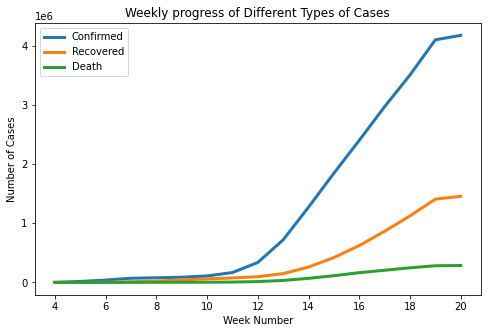

In [22]:
plt.figure(figsize=(8,5))
plt.plot(week_num,weekwise_confirmed,linewidth=3, label='Confirmed')
plt.plot(week_num,weekwise_recovered,linewidth=3, label = 'Recovered')
plt.plot(week_num,weekwise_deaths,linewidth=3, label = 'Death')
plt.ylabel("Number of Cases")
plt.xlabel("Week Number")
plt.title("Weekly progress of Different Types of Cases")
plt.legend()

In [23]:
datewise["Mortality Rate"]=(datewise["Deaths"]/datewise["Confirmed"])*100
datewise["Recovery Rate"]=(datewise["Recovered"]/datewise["Confirmed"])*100
datewise["Active Cases"]=datewise["Confirmed"]-datewise["Recovered"]-datewise["Deaths"]
datewise["Closed Cases"]=datewise["Recovered"]+datewise["Deaths"]

In [24]:
datewise.head()

,Confirmed,Recovered,Deaths,Days Since,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
ObservationDate,,,,,,,,,
2020-01-22,555.0,28.0,17.0,0 days,4,3.063063,5.045045,510.0,45.0
2020-01-23,653.0,30.0,18.0,1 days,4,2.756508,4.594181,605.0,48.0
2020-01-24,941.0,36.0,26.0,2 days,4,2.763018,3.825717,879.0,62.0
2020-01-25,1438.0,39.0,42.0,3 days,4,2.920723,2.712100,1357.0,81.0
2020-01-26,2118.0,52.0,56.0,4 days,4,2.644004,2.455146,2010.0,108.0


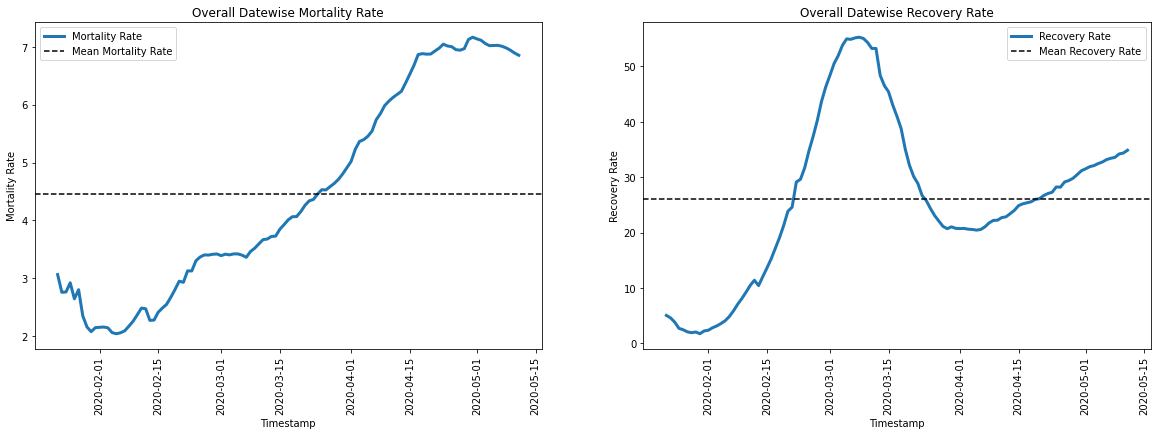

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,6))
ax1.plot(datewise["Mortality Rate"],label='Mortality Rate',linewidth=3)
ax1.axhline(datewise["Mortality Rate"].mean(),linestyle='--',color='black',label="Mean Mortality Rate")
ax1.set_ylabel("Mortality Rate")
ax1.set_xlabel("Timestamp")
ax1.set_title("Overall Datewise Mortality Rate")
ax1.legend()
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

ax2.plot(datewise["Recovery Rate"],label="Recovery Rate",linewidth=3)
ax2.axhline(datewise["Recovery Rate"].mean(),linestyle='--',color='black',label="Mean Recovery Rate")
ax2.set_ylabel("Recovery Rate")
ax2.set_xlabel("Timestamp")
ax2.set_title("Overall Datewise Recovery Rate")
ax2.legend()
for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
    

In [26]:
print("Average increase in number of Confirmed Cases every day: ")
print (np.round(datewise["Confirmed"].diff().fillna(0).mean()))
print("Average increase in number of Recovered Cases every day:")
print (np.round(datewise["Recovered"].diff().fillna(0).mean()))
print("Average increase in number of Deaths Cases every day")
print (np.round(datewise["Deaths"].diff().fillna(0).mean()))

Average increase in number of Confirmed Cases every day: 
37630.0
Average increase in number of Recovered Cases every day:
13119.0
Average increase in number of Deaths Cases every day
2579.0


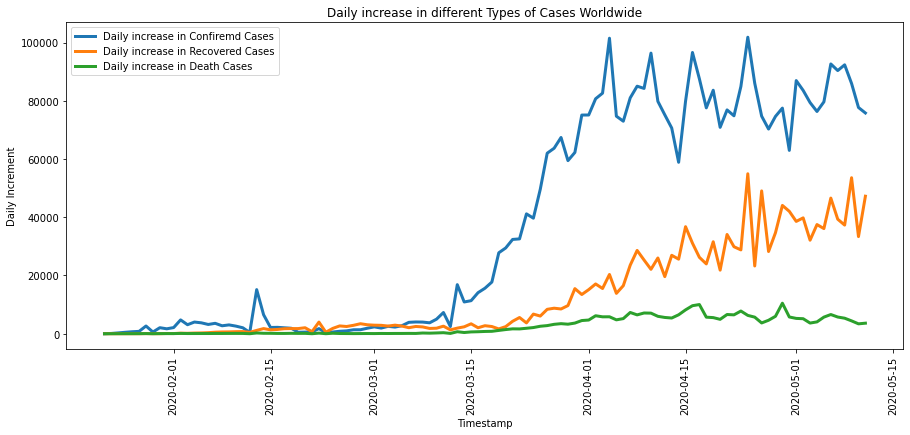

In [27]:
plt.figure(figsize=(15,6))
plt.plot(datewise["Confirmed"].diff().fillna(0),label="Daily increase in Confiremd Cases",linewidth=3)
plt.plot(datewise["Recovered"].diff().fillna(0),label="Daily increase in Recovered Cases",linewidth=3)
plt.plot(datewise["Deaths"].diff().fillna(0),label="Daily increase in Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Daily Increment")
plt.title("Daily increase in different Types of Cases Worldwide")
plt.xticks(rotation=90)
plt.legend()

In [28]:
datewise["Confirmed"]

ObservationDate
2020-01-22        555.0
2020-01-23        653.0
2020-01-24        941.0
2020-01-25       1438.0
2020-01-26       2118.0
                ...    
2020-05-07    3845718.0
2020-05-08    3938064.0
2020-05-09    4024009.0
2020-05-10    4101699.0
2020-05-11    4177504.0
Name: Confirmed, Length: 111, dtype: float64

In [29]:
datewise["Confirmed"].iloc[1]

653.0

In [30]:
datewise["Confirmed"].iloc[2]/datewise["Confirmed"].iloc[1]

1.44104134762634

In [ ]:
#GROWTH FACTOR

In [31]:
daily_increase_confirm=[]
daily_increase_recovered=[]
daily_increase_deaths=[]
for i in range(datewise.shape[0]-1):
    daily_increase_confirm.append(((datewise["Confirmed"].iloc[i+1]/datewise["Confirmed"].iloc[i])))
    daily_increase_recovered.append(((datewise["Recovered"].iloc[i+1]/datewise["Recovered"].iloc[i])))
    daily_increase_deaths.append(((datewise["Deaths"].iloc[i+1]/datewise["Deaths"].iloc[i])))
daily_increase_confirm.insert(0,1)
daily_increase_recovered.insert(0,1)
daily_increase_deaths.insert(0,1)

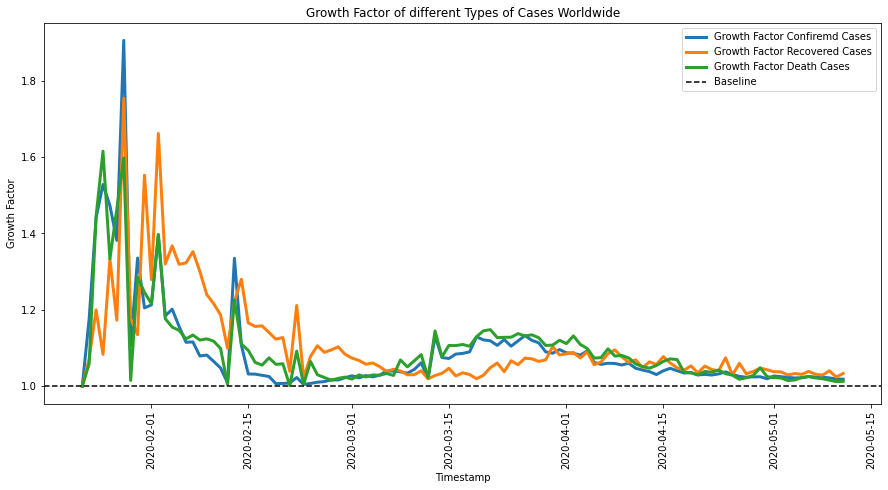

In [32]:
plt.figure(figsize=(15,7))
plt.plot(datewise.index,daily_increase_confirm,label="Growth Factor Confiremd Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_recovered,label="Growth Factor Recovered Cases",linewidth=3)
plt.plot(datewise.index,daily_increase_deaths,label="Growth Factor Death Cases",linewidth=3)
plt.xlabel("Timestamp")
plt.ylabel("Growth Factor")
plt.title("Growth Factor of different Types of Cases Worldwide")
plt.axhline(1,linestyle='--',color='black',label="Baseline")
plt.xticks(rotation=90)
plt.legend()

In [33]:
datewise["Confirmed"].iloc[[-1]]

ObservationDate
2020-05-11    4177504.0
Name: Confirmed, dtype: float64

In [34]:
c=1000
double_days=[]
C=[]
while(1):
    double_days.append(datewise[datewise["Confirmed"]<=c].iloc[[-1]]["Days Since"][0])
    C.append(c)
    c=c*2
    if(c<datewise["Confirmed"].max()):
        continue
    else:
        break

Text(0.5, 1.0, 'Days required for rise in cases by double')

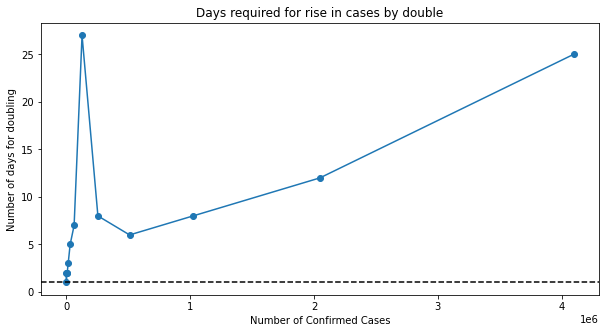

In [35]:
doubling_rate=pd.DataFrame(list(zip(C,double_days)),columns=["No. of cases","Days since first Case"])
doubling_rate["Number of days for doubling"]=doubling_rate["Days since first Case"].diff().fillna(doubling_rate["Days since first Case"])
#doubling_rate
plt.figure(figsize=(10,5))
plt.plot(doubling_rate["No. of cases"],doubling_rate["Number of days for doubling"].dt.days,marker='o')
plt.axhline(1,color='black',linestyle='--')
plt.ylabel("Number of days for doubling")
plt.xlabel("Number of Confirmed Cases")
plt.title("Days required for rise in cases by double")

In [36]:
doubling_rate.head()

,No. of cases,Days since first Case,Number of days for doubling
0,1000,2 days,2 days
1,2000,3 days,1 days
2,4000,5 days,2 days
3,8000,7 days,2 days
4,16000,10 days,3 days


In [37]:
covid.head()

,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,2020-01-22,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2020-01-22,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,2020-01-22,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,2020-01-22,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,2020-01-22,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [38]:
#Calculating countrywise Moratality and Recovery Rate
countrywise=covid[covid["ObservationDate"]==covid["ObservationDate"].max()]
countrywise = countrywise.groupby(["Country/Region"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})
countrywise = countrywise.sort_values(["Confirmed"],ascending=False)
countrywise["Mortality"]=(countrywise["Deaths"]/countrywise["Confirmed"])*100
countrywise["Recovery"]=(countrywise["Recovered"]/countrywise["Confirmed"])*100

In [39]:
countrywise.head()

,Confirmed,Recovered,Deaths,Mortality,Recovery
Country/Region,,,,,
US,1347881.0,232733.0,80682.0,5.985840,17.266584
Spain,227436.0,137139.0,26744.0,11.758912,60.297842
UK,224332.0,1015.0,32141.0,14.327425,0.452454
Russia,221344.0,39801.0,2009.0,0.907637,17.981513
Italy,219814.0,106587.0,30739.0,13.984096,48.489632


Text(0.5, 1.0, 'Top 15 countries as per Number of Death Cases')

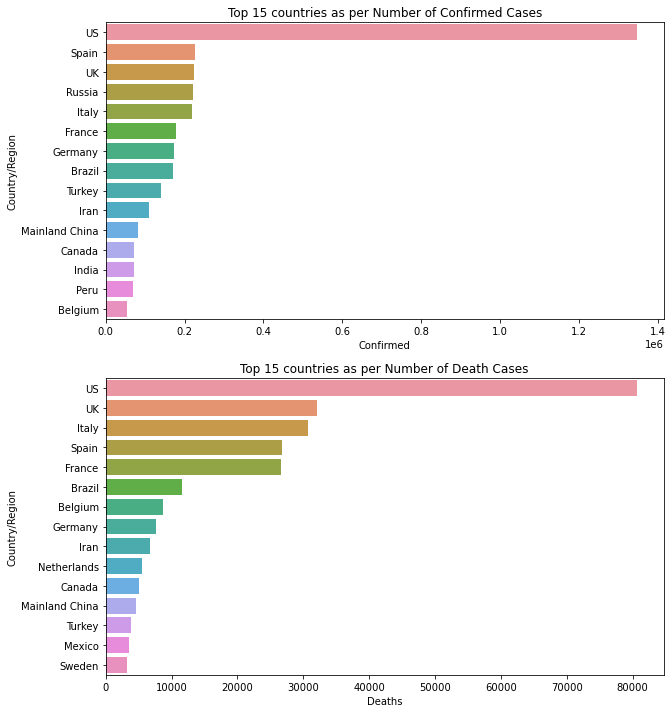

In [40]:
fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(10,12))
top_15_confirmed=countrywise.head(15)
top_15_deaths=countrywise.sort_values(["Deaths"],ascending=False).head(15)
sns.barplot(x=top_15_confirmed["Confirmed"],
            y=top_15_confirmed.index,
            ax=ax1)
ax1.set_title("Top 15 countries as per Number of Confirmed Cases")
sns.barplot(x=top_15_deaths["Deaths"],y=top_15_deaths.index,ax=ax2)
ax2.set_title("Top 15 countries as per Number of Death Cases")

In [41]:
grouped_country=covid.groupby(["Country/Region","ObservationDate"]).agg({"Confirmed":'sum',"Recovered":'sum',"Deaths":'sum'})

In [42]:
grouped_country["Active Cases"]=grouped_country["Confirmed"]-grouped_country["Recovered"]-grouped_country["Deaths"]
grouped_country["log_confirmed"]=np.log(grouped_country["Confirmed"])
grouped_country["log_active"]=np.log(grouped_country["Active Cases"])b

Text(0.5, 1.0, 'COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases')

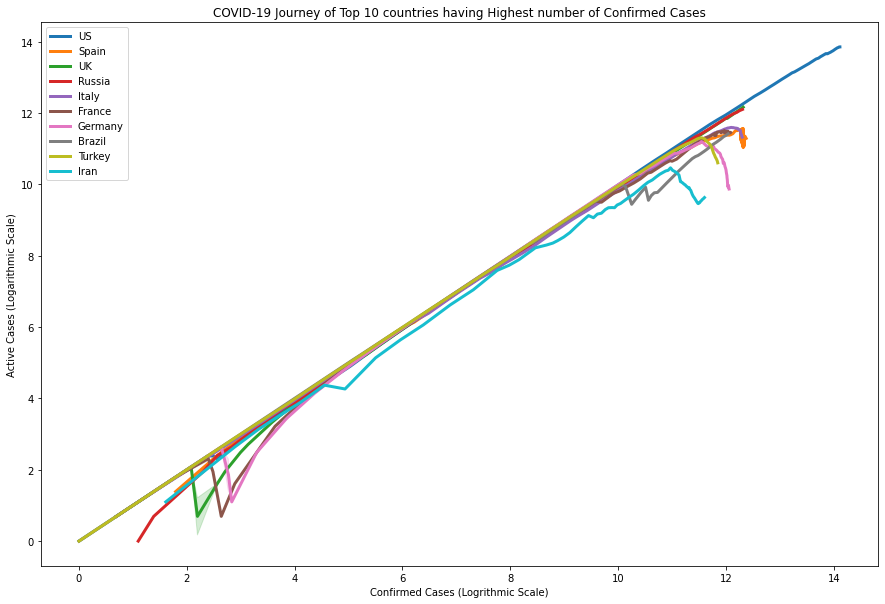

In [46]:
plt.figure(figsize=(15,10))
for country in countrywise.head(10).index:
    sns.lineplot(x=grouped_country.loc[country]["log_confirmed"],y=grouped_country.loc[country]["log_active"],
                 label=country,linewidth=3)
plt.xlabel("Confirmed Cases (Logrithmic Scale)")
plt.ylabel("Active Cases (Logarithmic Scale)")
plt.title("COVID-19 Journey of Top 10 countries having Highest number of Confirmed Cases")

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import PolynomialFeatures

In [54]:
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [57]:
from fbprophet import Prophet


ModuleNotFoundError: No module named 'fbprophet'

In [58]:
std=StandardScaler()

In [59]:
X=countrywise[["Confirmed","Recovered","Deaths"]]
X=std.fit_transform(X)

In [61]:
countrywise[["Confirmed","Recovered","Deaths"]].head()

,Confirmed,Recovered,Deaths
Country/Region,,,
US,1347881.0,232733.0,80682.0
Spain,227436.0,137139.0,26744.0
UK,224332.0,1015.0,32141.0
Russia,221344.0,39801.0,2009.0
Italy,219814.0,106587.0,30739.0


In [60]:
X

array([[ 1.26186243e+01,  8.51627472e+00,  1.09156615e+01],
       [ 1.95433767e+00,  4.89848459e+00,  3.47861383e+00],
       [ 1.92479410e+00, -2.53178305e-01,  4.22275982e+00],
       [ 1.89635461e+00,  1.21469215e+00,  6.81170660e-02],
       [ 1.88179222e+00,  3.74223291e+00,  4.02945008e+00],
       [ 1.47949902e+00,  1.85935015e+00,  3.46510145e+00],
       [ 1.43218552e+00,  5.21933763e+00,  8.47422816e-01],
       [ 1.40380314e+00,  2.25858094e+00,  1.39784542e+00],
       [ 1.11995072e+00,  3.33323801e+00,  3.20715816e-01],
       [ 8.29797456e-01,  3.01692642e+00,  7.12850556e-01],
       [ 5.78838913e-01,  2.66681892e+00,  4.29917895e-01],
       [ 4.67907756e-01,  9.57570715e-01,  4.96376737e-01],
       [ 4.63186876e-01,  5.61783854e-01,  1.07413269e-01],
       [ 4.44665037e-01,  5.56371966e-01,  6.14987581e-02],
       [ 2.98346318e-01,  2.26776655e-01,  9.91646774e-01],
       [ 1.98770019e-01, -2.85952393e-01,  5.46014046e-01],
       [ 1.79991196e-01,  1.90445101e-01

In [62]:
silhouette_score

<function sklearn.metrics.cluster._unsupervised.silhouette_score(X, labels, *, metric='euclidean', sample_size=None, random_state=None, **kwds)>

In [63]:
wcss=[]
sil=[]
for i in range(2,11):
    clf=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clf.fit(X)
    labels=clf.labels_
    centroids=clf.cluster_centers_
    sil.append(silhouette_score(X, labels, metric='euclidean'))
    wcss.append(clf.inertia_)

In [64]:
wcss

[214.2251867424826,
 63.802793630953765,
 38.94712135774341,
 26.521210684662307,
 17.548055925700247,
 12.763038706934099,
 10.154747240252547,
 7.375768908519786,
 5.453537090615886]

In [66]:
sil

[0.9585777955683362,
 0.9122068290367665,
 0.9051561252766827,
 0.9083143576604867,
 0.8460934526447947,
 0.8462664979066942,
 0.8358672400625432,
 0.8065013353308639,
 0.7382320340586298]

Text(0.5, 1.0, 'Silhouette Score Method')

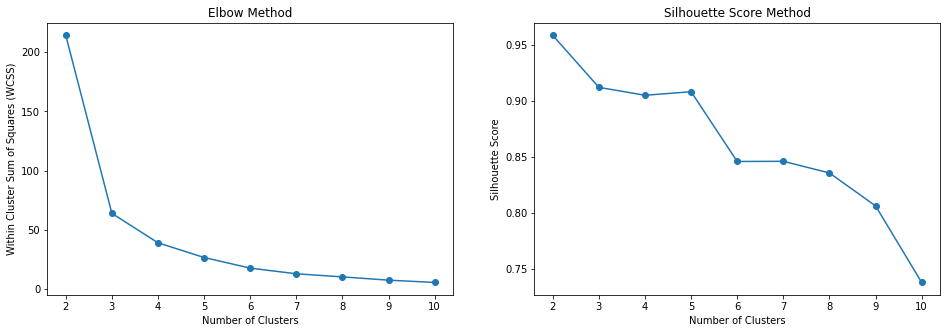

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,5))
x=np.arange(2,11)
ax1.plot(x,wcss,marker='o')
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Within Cluster Sum of Squares (WCSS)")
ax1.set_title("Elbow Method")
x=np.arange(2,11)
ax2.plot(x,sil,marker='o')
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Silhouette Score")
ax2.set_title("Silhouette Score Method")

In [68]:
#Correct number of Clusters could be k=4

In [70]:
clf_final=KMeans(n_clusters=5,init='k-means++',random_state=42)
clf_final.fit(X)

KMeans(n_clusters=5, random_state=42)

In [71]:
countrywise["Clusters"]=clf_final.predict(X)

In [72]:
countrywise["Clusters"]

Country/Region
US                  1
Spain               4
UK                  2
Russia              3
Italy               4
                   ..
Suriname            0
MS Zaandam          0
Mauritania          0
Papua New Guinea    0
Western Sahara      0
Name: Clusters, Length: 189, dtype: int32

In [73]:
cluster_summary=pd.concat([countrywise[countrywise["Clusters"]==1],
                           countrywise[countrywise["Clusters"]==2],
                           countrywise[countrywise["Clusters"]==3],
                           countrywise[countrywise["Clusters"]==4],
                           countrywise[countrywise["Clusters"]==0].head(15)])

In [75]:
cluster_summary.style.background_gradient(cmap='Reds')

,Confirmed,Recovered,Deaths,Mortality,Recovery,Clusters
Country/Region,,,,,,
US,1347881.000000,232733.000000,80682.000000,5.985840,17.266584,1
UK,224332.000000,1015.000000,32141.000000,14.327425,0.452454,2
France,177547.000000,56835.000000,26646.000000,15.007857,32.011242,2
Russia,221344.000000,39801.000000,2009.000000,0.907637,17.981513,3
Germany,172576.000000,145617.000000,7661.000000,4.439204,84.378477,3
Brazil,169594.000000,67384.000000,11653.000000,6.871116,39.732538,3
Turkey,139771.000000,95780.000000,3841.000000,2.748066,68.526375,3
Iran,109286.000000,87422.000000,6685.000000,6.116977,79.993778,3
Mainland China,82919.000000,78171.000000,4633.000000,5.587380,94.273930,3


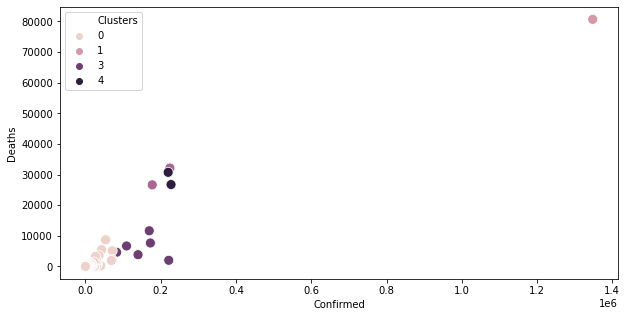

In [76]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=countrywise["Confirmed"],y=countrywise["Deaths"],hue=countrywise["Clusters"],s=100)

### Prediction using Machine Learning Models

In [84]:
datewise.iloc[0]

Confirmed         555.000000
Recovered          28.000000
Deaths             17.000000
Days Since          0.000000
WeekOfYear          4.000000
Mortality Rate      3.063063
Recovery Rate       5.045045
Active Cases      510.000000
Closed Cases       45.000000
Name: 2020-01-22 00:00:00, dtype: float64

In [77]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [78]:
datewise.head()

,Confirmed,Recovered,Deaths,Days Since,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
ObservationDate,,,,,,,,,
2020-01-22,555.0,28.0,17.0,0,4,3.063063,5.045045,510.0,45.0
2020-01-23,653.0,30.0,18.0,1,4,2.756508,4.594181,605.0,48.0
2020-01-24,941.0,36.0,26.0,2,4,2.763018,3.825717,879.0,62.0
2020-01-25,1438.0,39.0,42.0,3,4,2.920723,2.712100,1357.0,81.0
2020-01-26,2118.0,52.0,56.0,4,4,2.644004,2.455146,2010.0,108.0


In [85]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]
model_scores=[]

In [86]:
lin_reg=LinearRegression(normalize=True)

In [93]:
lin_reg.fit(np.array(train_ml["Days Since"]).reshape(-1,1),
            np.array(train_ml["Confirmed"]).reshape(-1,1))

LinearRegression(normalize=True)

In [94]:
prediction_valid_linreg = lin_reg.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [95]:
prediction_valid_linreg

array([[2602442.4018315 ],
       [2635097.41085078],
       [2667752.41987007],
       [2700407.42888935],
       [2733062.43790863],
       [2765717.44692791]])

In [96]:
valid_ml["Confirmed"]

ObservationDate
2020-05-06    3755341.0
2020-05-07    3845718.0
2020-05-08    3938064.0
2020-05-09    4024009.0
2020-05-10    4101699.0
2020-05-11    4177504.0
Name: Confirmed, dtype: float64

In [97]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],
                                               prediction_valid_linreg)))

In [98]:
np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_linreg))

1292716.6052360507

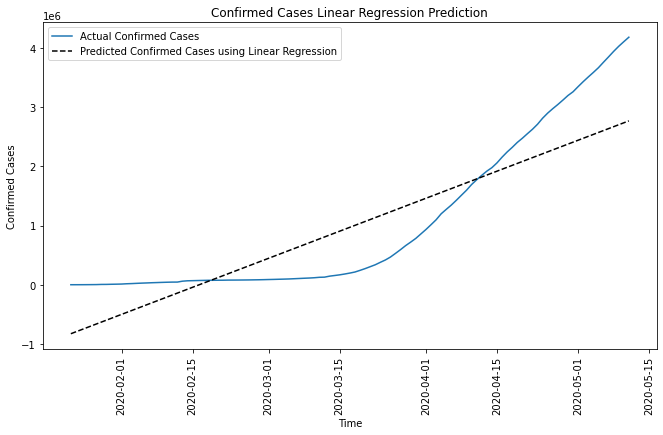

In [99]:
plt.figure(figsize=(11,6))
prediction_linreg=lin_reg.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Actual Confirmed Cases")
plt.plot(datewise.index,prediction_linreg, linestyle='--',label="Predicted Confirmed Cases using Linear Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Linear Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [100]:
#The Linear Regression Model is absolutely falling aprat. As it is clearly visible that the trend of Confirmed Cases in absolutely not Linear

In [101]:
poly = PolynomialFeatures(degree = 6)

In [102]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Confirmed"]

In [103]:
train_poly

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01],
       [1.00000000e+00, 3.00000000e+00, 9.00000000e+00, 2.70000000e+01,
        8.10000000e+01, 2.43000000e+02, 7.29000000e+02],
       [1.00000000e+00, 4.00000000e+00, 1.60000000e+01, 6.40000000e+01,
        2.56000000e+02, 1.02400000e+03, 4.09600000e+03],
       [1.00000000e+00, 5.00000000e+00, 2.50000000e+01, 1.25000000e+02,
        6.25000000e+02, 3.12500000e+03, 1.56250000e+04],
       [1.00000000e+00, 6.00000000e+00, 3.60000000e+01, 2.16000000e+02,
        1.29600000e+03, 7.77600000e+03, 4.66560000e+04],
       [1.00000000e+00, 7.00000000e+00, 4.90000000e+01, 3.43000000e+02,
        2.40100000e+03, 1

In [104]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

In [105]:
prediction_poly=linreg.predict(valid_poly)
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_poly))
model_scores.append(rmse_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)

Root Mean Squared Error for Polynomial Regression:  136363.888779452


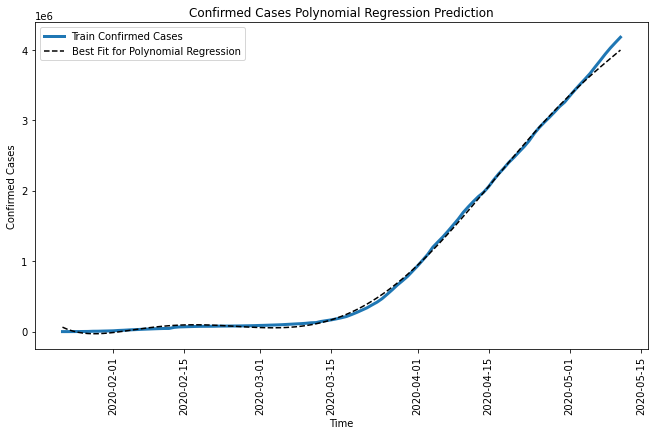

In [106]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,predictions_poly, linestyle='--',label="Best Fit for Polynomial Regression",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Polynomial Regression Prediction")
plt.xticks(rotation=90)
plt.legend()

In [107]:
new_prediction_poly=[]
for i in range(1,18):
    new_date_poly=poly.fit_transform(np.array(datewise["Days Since"].max()+i).reshape(-1,1))
    new_prediction_poly.append(linreg.predict(new_date_poly)[0])

[4055337.71920925]
[4115829.89197683]
[4177165.09495942]
[4239814.73612833]
[4304301.7041418]
[4371202.78972042]
[4441151.15284133]
[4514838.83575133]
[4593019.32179976]
[4676510.1400902]
[4766195.51595172]
[4863029.06722909]
[4968036.54639238]
[5082318.62846598]
[5207053.74477607]
[5343500.96251893]
[5493002.91014594]


In [108]:
new_prediction_poly

[4055337.7192092547,
 4115829.8919768343,
 4177165.094959424,
 4239814.736128331,
 4304301.704141797,
 4371202.789720417,
 4441151.1528413305,
 4514838.835751326,
 4593019.321799756,
 4676510.140090198,
 4766195.515951724,
 4863029.067229093,
 4968036.546392382,
 5082318.628465981,
 5207053.744776071,
 5343500.962518931,
 5493002.910145939]

In [109]:
#Support Vector Machine ModelRegressor for Prediction of Confirmed Cases

In [111]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [112]:
svm=SVR(C=1,degree=5,kernel='poly',epsilon=0.01)
#Intializing SVR Model

In [113]:
#Fitting model on the training data
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),
        np.array(train_ml["Confirmed"]).reshape(-1,1))

SVR(C=1, degree=5, epsilon=0.01, kernel='poly')

In [114]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [115]:
model_scores.append(np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm)))
np.sqrt(mean_squared_error(valid_ml["Confirmed"],prediction_valid_svm))

396495.4682961103

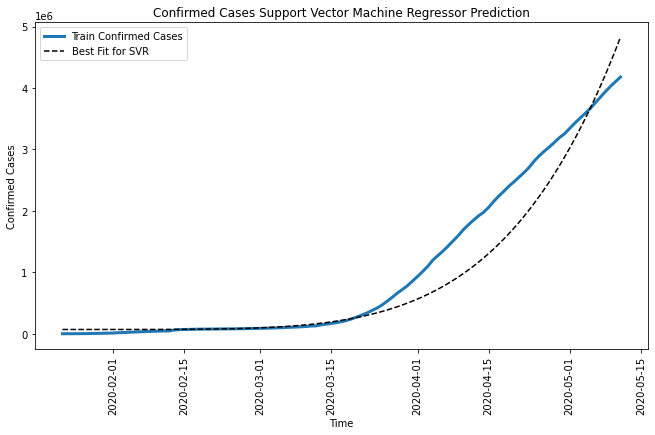

In [116]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
plt.plot(datewise["Confirmed"],label="Train Confirmed Cases",linewidth=3)
plt.plot(datewise.index,prediction_svm, linestyle='--',label="Best Fit for SVR",color='black')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases Support Vector Machine Regressor Prediction")
plt.xticks(rotation=90)
plt.legend()

In [117]:
new_date=[]
new_prediction_lr=[]
new_prediction_svm=[]
for i in range(1,18):
    new_date.append(datewise.index[-1]+timedelta(days=i))
    new_prediction_lr.append(lin_reg.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0][0])
    new_prediction_svm.append(svm.predict(np.array(datewise["Days Since"].max()+i).reshape(-1,1))[0])

In [118]:
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_date, 
                                   new_prediction_lr, 
                                   new_prediction_poly,
                                   new_prediction_svm),
                               columns=["Dates","Linear Regression Prediction",
                                        "Polynonmial Regression Prediction","SVM Prediction"])
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction
0,2020-05-12,2798372.455947,4055337.719209,5045987.283275
1,2020-05-13,2831027.464966,4115829.891977,5274221.311969
2,2020-05-14,2863682.473986,4177165.094959,5510753.749560
3,2020-05-15,2896337.483005,4239814.736128,5755808.859411
4,2020-05-16,2928992.492024,4304301.704142,6009614.909428


In [119]:
# Time Series Forecasting

In [120]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]

In [121]:
Holt

statsmodels.tsa.holtwinters.Holt

In [122]:
holt=Holt(np.asarray(model_train["Confirmed"]))

In [129]:
holt = holt.fit(smoothing_level=1.0, smoothing_slope=0.1,optimized=False)

In [124]:
y_pred=valid.copy()

In [125]:
len(valid)

6

In [128]:
holt.__dir__

<function Holt.__dir__()>

In [130]:
y_pred["Holt"]=holt.forecast(len(valid))

In [131]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"])))
np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt"]))

39406.10236176523

In [135]:
y_pred.Holt

ObservationDate
2020-05-06   3740892.393426
2020-05-07   3819093.786852
2020-05-08   3897295.180277
2020-05-09   3975496.573703
2020-05-10   4053697.967129
2020-05-11   4131899.360555
Name: Holt, dtype: float64

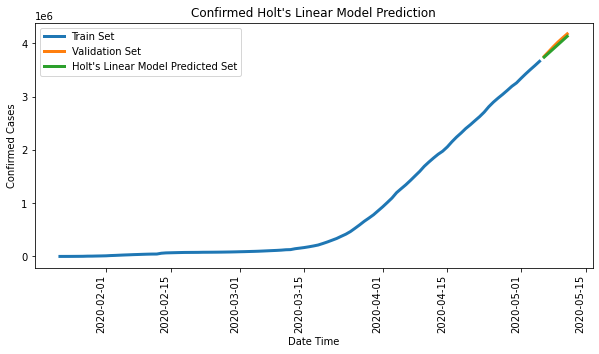

In [132]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",linewidth=3)
valid.Confirmed.plot(label="Validation Set",linewidth=3)
y_pred.Holt.plot(label="Holt's Linear Model Predicted Set",linewidth=3)
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confirmed Holt's Linear Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [136]:
holt_new_date=[]
holt_new_prediction=[]
for i in range(1,18):
    holt_new_date.append(datewise.index[-1]+timedelta(days=i))
    holt_new_prediction.append(holt.forecast((len(valid)+i))[-1])
model_predictions["Holt's Linear Model Prediction"]=holt_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction
0,2020-05-12,2798372.455947,4055337.719209,5045987.283275,4210100.753981
1,2020-05-13,2831027.464966,4115829.891977,5274221.311969,4288302.147406
2,2020-05-14,2863682.473986,4177165.094959,5510753.749560,4366503.540832
3,2020-05-15,2896337.483005,4239814.736128,5755808.859411,4444704.934258
4,2020-05-16,2928992.492024,4304301.704142,6009614.909428,4522906.327684


In [137]:
## Holt's Winter Model for Daily Time Series

In [138]:
ExponentialSmoothing

statsmodels.tsa.holtwinters.ExponentialSmoothing

In [139]:
model_train

,Confirmed,Recovered,Deaths,Days Since,WeekOfYear,Mortality Rate,Recovery Rate,Active Cases,Closed Cases
ObservationDate,,,,,,,,,
2020-01-22,555.000000,28.000000,17.000000,0,4,3.063063,5.045045,510.000000,45.000000
2020-01-23,653.000000,30.000000,18.000000,1,4,2.756508,4.594181,605.000000,48.000000
2020-01-24,941.000000,36.000000,26.000000,2,4,2.763018,3.825717,879.000000,62.000000
2020-01-25,1438.000000,39.000000,42.000000,3,4,2.920723,2.712100,1357.000000,81.000000
2020-01-26,2118.000000,52.000000,56.000000,4,4,2.644004,2.455146,2010.000000,108.000000
...,...,...,...,...,...,...,...,...,...
2020-05-01,3343777.000000,1053327.000000,238650.000000,100,18,7.137139,31.501114,2051800.000000,1291977.000000
2020-05-02,3427343.000000,1093112.000000,243808.000000,101,18,7.113615,31.893861,2090423.000000,1336920.000000
2020-05-03,3506729.000000,1125236.000000,247470.000000,102,18,7.057004,32.087909,2134023.000000,1372706.000000


In [140]:
es=ExponentialSmoothing(np.asarray(model_train['Confirmed']),
                        seasonal_periods=10,
                        trend='mul', 
                        seasonal='add').fit()

In [142]:
y_pred["Holt's Winter Model"]=es.forecast(len(valid))

In [144]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"])))
np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["Holt's Winter Model"]))

18981.45893839612

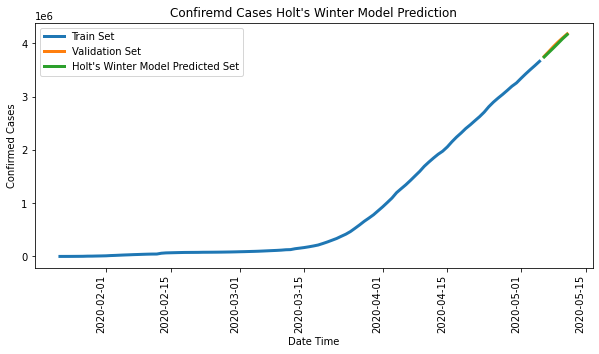

In [145]:
plt.figure(figsize=(10,5))
plt.plot(model_train.Confirmed,label="Train Set",linewidth=3)
valid.Confirmed.plot(label="Validation Set",linewidth=3)
y_pred["Holt\'s Winter Model"].plot(label="Holt's Winter Model Predicted Set",linewidth=3)
plt.ylabel("Confirmed Cases")
plt.xlabel("Date Time")
plt.title("Confiremd Cases Holt's Winter Model Prediction")
plt.xticks(rotation=90)
plt.legend()

In [146]:
holt_winter_new_prediction=[]
for i in range(1,18):
    holt_winter_new_prediction.append(es.forecast((len(valid)+i))[-1])
model_predictions["Holt's Winter Model Prediction"]=holt_winter_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction
0,2020-05-12,2798372.455947,4055337.719209,5045987.283275,4210100.753981,4254173.053406
1,2020-05-13,2831027.464966,4115829.891977,5274221.311969,4288302.147406,4345322.238890
2,2020-05-14,2863682.473986,4177165.094959,5510753.749560,4366503.540832,4438293.588034
3,2020-05-15,2896337.483005,4239814.736128,5755808.859411,4444704.934258,4533090.542488
4,2020-05-16,2928992.492024,4304301.704142,6009614.909428,4522906.327684,4629698.830262


In [159]:
#AR Model (using AUTO ARIMA)

In [160]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [161]:
from pmdarima.arima import auto_arima

In [162]:
model_ma = auto_arima(model_train["Confirmed"], trace=True, 
                     error_action='ignore', 
                     start_p=0, start_q=0, max_p=0, max_q=3,
                     suppress_warnings=True,
                     stepwise=False,
                     seasonal=False)
model_ma.fit(model_train["Confirmed"])

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2135.250, BIC=2140.519, Time=0.029 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=2130.787, BIC=2138.691, Time=0.063 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=2131.685, BIC=2142.224, Time=0.083 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=2134.529, BIC=2147.702, Time=0.084 seconds
Total fit time: 0.275 seconds


ARIMA(order=(0, 2, 1), suppress_warnings=True)

In [163]:
auto_arima

<function pmdarima.arima.auto.auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None, method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='trace', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, sarimax_kwargs=None, **fit_args)>

In [164]:
model_ar= auto_arima(model_train["Confirmed"],
                     trace=True, 
                     error_action='ignore',
                     start_p=0,
                     start_q=0,
                     max_p=5,
                     max_q=0,
                    suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Confirmed"])

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2135.250, BIC=2140.519, Time=0.035 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=2132.981, BIC=2140.885, Time=0.026 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=2131.098, BIC=2141.637, Time=0.052 seconds
Fit ARIMA(3,2,0)x(0,0,0,0) [intercept=True]; AIC=2132.317, BIC=2145.491, Time=0.068 seconds
Fit ARIMA(4,2,0)x(0,0,0,0) [intercept=True]; AIC=2132.392, BIC=2148.200, Time=0.127 seconds
Fit ARIMA(5,2,0)x(0,0,0,0) [intercept=True]; AIC=2132.139, BIC=2150.582, Time=0.121 seconds
Total fit time: 0.435 seconds


ARIMA(order=(2, 2, 0), suppress_warnings=True)

In [165]:
prediction_ar=model_ar.predict(len(valid))
y_pred["AR Model Prediction"]=prediction_ar

In [166]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"])))
np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["AR Model Prediction"]))

26859.381845132346

(array([737456., 737470., 737485., 737499., 737516., 737530., 737546.,
        737560.]),
 <a list of 8 Text major ticklabel objects>)

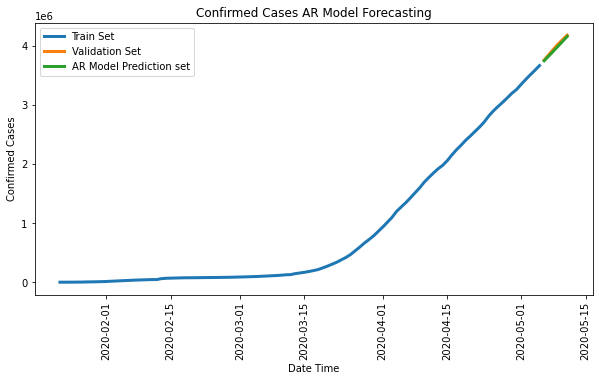

In [167]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],
         label="Validation Set",linewidth=3)
plt.plot(y_pred["AR Model Prediction"],label="AR Model Prediction set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases AR Model Forecasting")
plt.xticks(rotation=90)

In [168]:
AR_model_new_prediction=[]
for i in range(1,18):
    AR_model_new_prediction.append(model_ar.predict(len(valid)+i)[-1])
model_predictions["AR Model Prediction"]=AR_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction
0,2020-05-12,2798372.455947,4055337.719209,5045987.283275,4210100.753981,4254173.053406,4240438.481543
1,2020-05-13,2831027.464966,4115829.891977,5274221.311969,4288302.147406,4345322.238890,4326056.217688
2,2020-05-14,2863682.473986,4177165.094959,5510753.749560,4366503.540832,4438293.588034,4412451.179773
3,2020-05-15,2896337.483005,4239814.736128,5755808.859411,4444704.934258,4533090.542488,4499625.344803
4,2020-05-16,2928992.492024,4304301.704142,6009614.909428,4522906.327684,4629698.830262,4587578.327546


In [169]:
## MA Model (using AUTO ARIMA)

In [170]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [171]:
model_ma= auto_arima(model_train["Confirmed"],
                     trace=True,
                     error_action='ignore',
                     start_p=0,
                     start_q=0,
                     max_p=0,
                     max_q=3,
                     suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Confirmed"])

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2135.250, BIC=2140.519, Time=0.017 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=2130.787, BIC=2138.691, Time=0.049 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=2131.685, BIC=2142.224, Time=0.065 seconds
Fit ARIMA(0,2,3)x(0,0,0,0) [intercept=True]; AIC=2134.529, BIC=2147.702, Time=0.132 seconds
Total fit time: 0.277 seconds


ARIMA(order=(0, 2, 1), suppress_warnings=True)

In [172]:
prediction_ma=model_ma.predict(len(valid))
y_pred["MA Model Prediction"]=prediction_ma

In [173]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma)))
np.sqrt(mean_squared_error(valid["Confirmed"],prediction_ma))

24021.875554022754

(array([737456., 737470., 737485., 737499., 737516., 737530., 737546.,
        737560.]),
 <a list of 8 Text major ticklabel objects>)

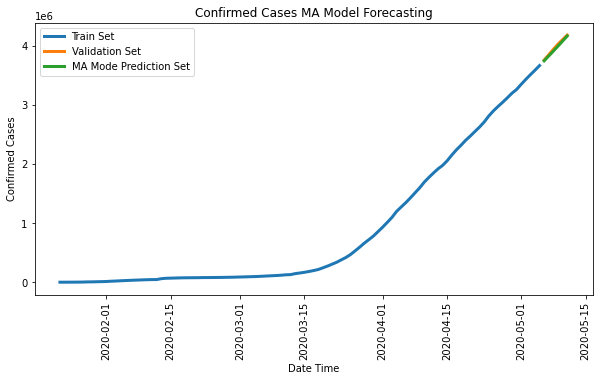

In [174]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",linewidth=3)
plt.plot(y_pred["MA Model Prediction"],label="MA Mode Prediction Set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases MA Model Forecasting")
plt.xticks(rotation=90)

In [175]:
MA_model_new_prediction=[]
for i in range(1,18):
    MA_model_new_prediction.append(model_ma.predict(len(valid)+i)[-1])
model_predictions["MA Model Prediction"]=MA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction
0,2020-05-12,2798372.455947,4055337.719209,5045987.283275,4210100.753981,4254173.053406,4240438.481543,4249042.966691
1,2020-05-13,2831027.464966,4115829.891977,5274221.311969,4288302.147406,4345322.238890,4326056.217688,4337067.035583
2,2020-05-14,2863682.473986,4177165.094959,5510753.749560,4366503.540832,4438293.588034,4412451.179773,4426155.980032
3,2020-05-15,2896337.483005,4239814.736128,5755808.859411,4444704.934258,4533090.542488,4499625.344803,4516309.800036
4,2020-05-16,2928992.492024,4304301.704142,6009614.909428,4522906.327684,4629698.830262,4587578.327546,4607528.495595


In [176]:
# ARIMA Model (using AUTOARIMA)

In [177]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

In [178]:
model_arima= auto_arima(model_train["Confirmed"],
                        trace=True, 
                        error_action='ignore', 
                        start_p=1,
                        start_q=1,
                        max_p=2,
                        max_q=2,
                        suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Confirmed"])

Fit ARIMA(0,2,0)x(0,0,0,0) [intercept=True]; AIC=2135.250, BIC=2140.519, Time=0.024 seconds
Fit ARIMA(0,2,1)x(0,0,0,0) [intercept=True]; AIC=2130.787, BIC=2138.691, Time=0.048 seconds
Fit ARIMA(0,2,2)x(0,0,0,0) [intercept=True]; AIC=2131.685, BIC=2142.224, Time=0.094 seconds
Fit ARIMA(1,2,0)x(0,0,0,0) [intercept=True]; AIC=2132.981, BIC=2140.885, Time=0.030 seconds
Fit ARIMA(1,2,1)x(0,0,0,0) [intercept=True]; AIC=2132.916, BIC=2143.455, Time=0.090 seconds
Fit ARIMA(1,2,2)x(0,0,0,0) [intercept=True]; AIC=2132.328, BIC=2145.502, Time=0.161 seconds
Fit ARIMA(2,2,0)x(0,0,0,0) [intercept=True]; AIC=2131.098, BIC=2141.637, Time=0.050 seconds
Fit ARIMA(2,2,1)x(0,0,0,0) [intercept=True]; AIC=2132.309, BIC=2145.483, Time=0.170 seconds
Fit ARIMA(2,2,2)x(0,0,0,0) [intercept=True]; AIC=2134.443, BIC=2150.252, Time=0.261 seconds
Total fit time: 1.025 seconds


ARIMA(order=(0, 2, 1), suppress_warnings=True)

In [179]:
prediction_arima=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction_arima

In [180]:
model_scores.append(np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima)))
np.sqrt(mean_squared_error(valid["Confirmed"],prediction_arima))

24021.875554022754

(array([737456., 737470., 737485., 737499., 737516., 737530., 737546.,
        737560.]),
 <a list of 8 Text major ticklabel objects>)

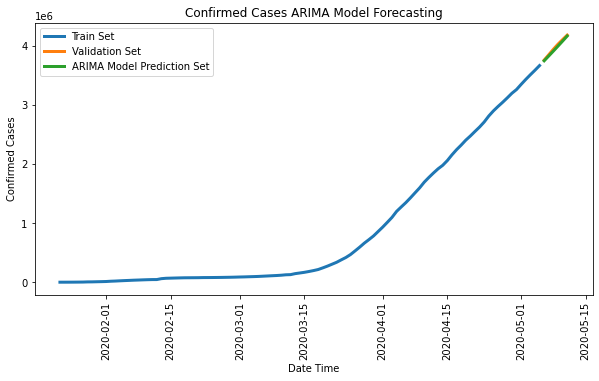

In [181]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",linewidth=3)
plt.plot(y_pred["ARIMA Model Prediction"],label="ARIMA Model Prediction Set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases ARIMA Model Forecasting")
plt.xticks(rotation=90)

In [182]:
ARIMA_model_new_prediction=[]
for i in range(1,18):
    ARIMA_model_new_prediction.append(model_arima.predict(len(valid)+i)[-1])
model_predictions["ARIMA Model Prediction"]=ARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction
0,2020-05-12,2798372.455947,4055337.719209,5045987.283275,4210100.753981,4254173.053406,4240438.481543,4249042.966691,4249042.966691
1,2020-05-13,2831027.464966,4115829.891977,5274221.311969,4288302.147406,4345322.238890,4326056.217688,4337067.035583,4337067.035583
2,2020-05-14,2863682.473986,4177165.094959,5510753.749560,4366503.540832,4438293.588034,4412451.179773,4426155.980032,4426155.980032
3,2020-05-15,2896337.483005,4239814.736128,5755808.859411,4444704.934258,4533090.542488,4499625.344803,4516309.800036,4516309.800036
4,2020-05-16,2928992.492024,4304301.704142,6009614.909428,4522906.327684,4629698.830262,4587578.327546,4607528.495595,4607528.495595


In [183]:
## SARIMA Model (using AUTO ARIMA)


In [184]:
model_sarima= auto_arima(model_train["Confirmed"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=3,max_q=3,m=24,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Confirmed"])

Performing stepwise search to minimize aic
Fit ARIMA(0,2,0)x(1,0,1,24) [intercept=True]; AIC=2138.199, BIC=2148.738, Time=0.606 seconds
Fit ARIMA(0,2,0)x(0,0,0,24) [intercept=True]; AIC=2135.250, BIC=2140.519, Time=0.013 seconds
Fit ARIMA(1,2,0)x(1,0,0,24) [intercept=True]; AIC=2134.838, BIC=2145.377, Time=0.473 seconds
Fit ARIMA(0,2,1)x(0,0,1,24) [intercept=True]; AIC=2132.769, BIC=2143.308, Time=0.543 seconds
Fit ARIMA(0,2,0)x(0,0,0,24) [intercept=False]; AIC=2134.346, BIC=2136.980, Time=0.031 seconds
Fit ARIMA(0,2,1)x(0,0,0,24) [intercept=True]; AIC=2130.787, BIC=2138.691, Time=0.065 seconds
Fit ARIMA(0,2,1)x(1,0,0,24) [intercept=True]; AIC=2132.703, BIC=2143.242, Time=0.339 seconds
Fit ARIMA(0,2,1)x(1,0,1,24) [intercept=True]; AIC=2134.402, BIC=2147.575, Time=1.465 seconds
Fit ARIMA(1,2,1)x(0,0,0,24) [intercept=True]; AIC=2132.916, BIC=2143.455, Time=0.101 seconds
Fit ARIMA(0,2,2)x(0,0,0,24) [intercept=True]; AIC=2131.685, BIC=2142.224, Time=0.110 seconds
Fit ARIMA(1,2,0)x(0,0,0,24

ARIMA(order=(0, 2, 1), seasonal_order=(0, 0, 0, 24), suppress_warnings=True)

In [185]:
prediction_sarima=model_sarima.predict(len(valid))
y_pred["SARIMA Model Prediction"]=prediction_sarima

In [186]:
model_scores.append(np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"])))
np.sqrt(mean_squared_error(y_pred["Confirmed"],y_pred["SARIMA Model Prediction"]))

24021.875554022754

(array([737456., 737470., 737485., 737499., 737516., 737530., 737546.,
        737560.]),
 <a list of 8 Text major ticklabel objects>)

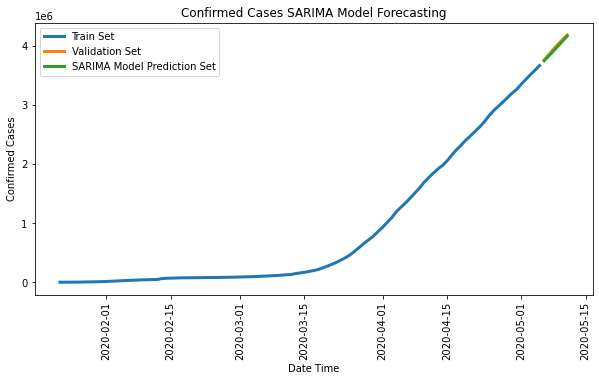

In [187]:
plt.figure(figsize=(10,5))
plt.plot(model_train.index,model_train["Confirmed"],label="Train Set",linewidth=3)
plt.plot(valid.index,valid["Confirmed"],label="Validation Set",linewidth=3)
plt.plot(y_pred["SARIMA Model Prediction"],label="SARIMA Model Prediction Set",linewidth=3)
plt.legend()
plt.xlabel("Date Time")
plt.ylabel('Confirmed Cases')
plt.title("Confirmed Cases SARIMA Model Forecasting")
plt.xticks(rotation=90)

In [188]:
SARIMA_model_new_prediction=[]
for i in range(1,18):
    SARIMA_model_new_prediction.append(model_sarima.predict(len(valid)+i)[-1])
model_predictions["SARIMA Model Prediction"]=SARIMA_model_new_prediction
model_predictions.head()

,Dates,Linear Regression Prediction,Polynonmial Regression Prediction,SVM Prediction,Holt's Linear Model Prediction,Holt's Winter Model Prediction,AR Model Prediction,MA Model Prediction,ARIMA Model Prediction,SARIMA Model Prediction
0,2020-05-12,2798372.455947,4055337.719209,5045987.283275,4210100.753981,4254173.053406,4240438.481543,4249042.966691,4249042.966691,4249042.966691
1,2020-05-13,2831027.464966,4115829.891977,5274221.311969,4288302.147406,4345322.238890,4326056.217688,4337067.035583,4337067.035583,4337067.035583
2,2020-05-14,2863682.473986,4177165.094959,5510753.749560,4366503.540832,4438293.588034,4412451.179773,4426155.980032,4426155.980032,4426155.980032
3,2020-05-15,2896337.483005,4239814.736128,5755808.859411,4444704.934258,4533090.542488,4499625.344803,4516309.800036,4516309.800036,4516309.800036
4,2020-05-16,2928992.492024,4304301.704142,6009614.909428,4522906.327684,4629698.830262,4587578.327546,4607528.495595,4607528.495595,4607528.495595
